In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv (r"C:\Users\admin\Desktop\Machine learning\ML\Customer_Data.csv")
df = pd.DataFrame (data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.describe(include = "all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df1 = df.dropna ()
df1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
df1.describe(include = "all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
unique,8636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,NaN,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,NaN,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,NaN,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,NaN,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000


In [7]:
df1.drop ("CUST_ID" , axis = 1 , inplace = True )
df1

C:\Users\admin\AppData\Local\Temp\ipykernel_3796\2050377243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop ("CUST_ID" , axis = 1 , inplace = True )


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
df1["CASH_ADVANCE_TRX"].nunique()

65

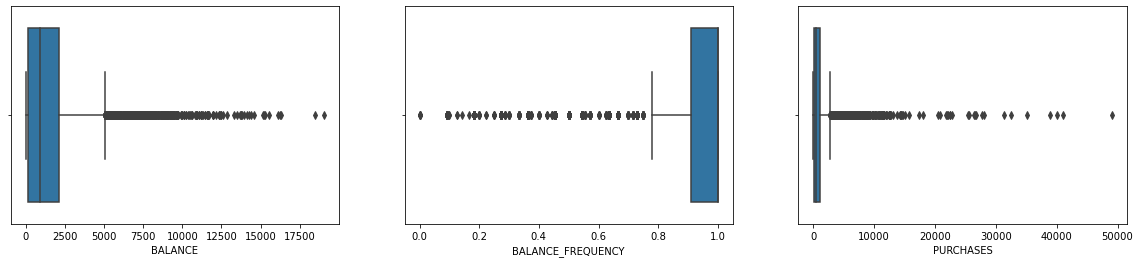

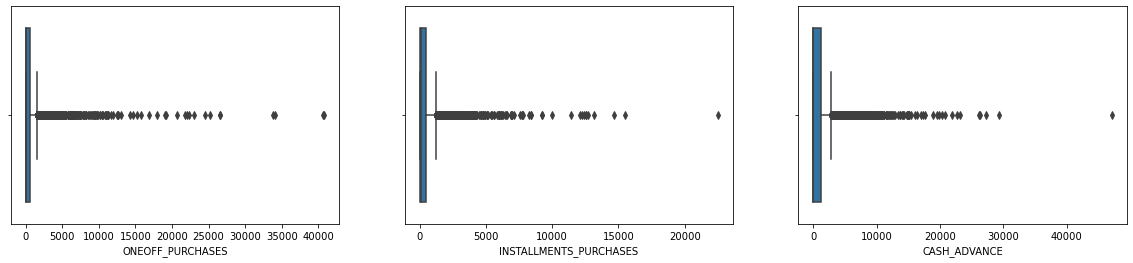

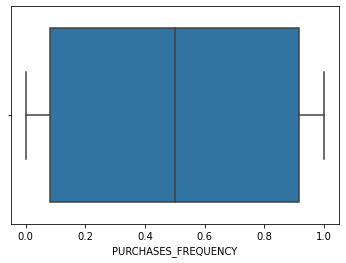

In [9]:
Numerical = ["BALANCE" , "BALANCE_FREQUENCY" , "PURCHASES" , "ONEOFF_PURCHASES" , "INSTALLMENTS_PURCHASES" ,"CASH_ADVANCE" ,"PURCHASES_FREQUENCY"] 

i = 0
while i < 8 :
    fig = plt.figure ( figsize = [20 , 4])
    plt.subplot ( 1 , 3 , 1)
    sns.boxplot ( x = Numerical[i] , data = df1 )
    i += 1
    if i == 7:
        break
    plt.subplot ( 1 , 3 , 2)
    sns.boxplot ( x = Numerical[i] , data = df1 )
    i += 1
    plt.subplot ( 1 , 3 , 3)
    sns.boxplot ( x = Numerical[i] , data = df1 )
    i += 1
    plt.show()


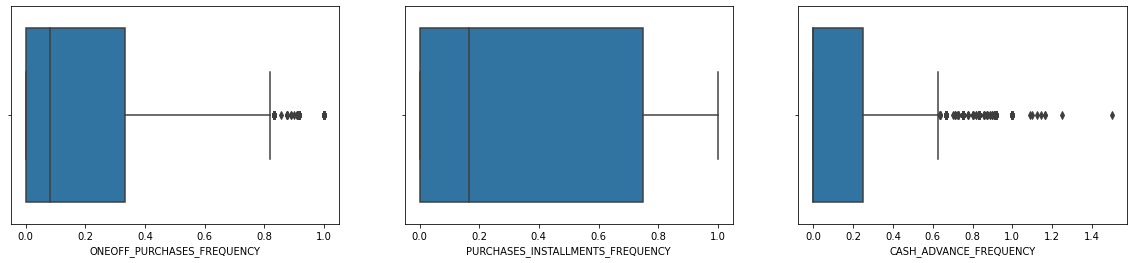

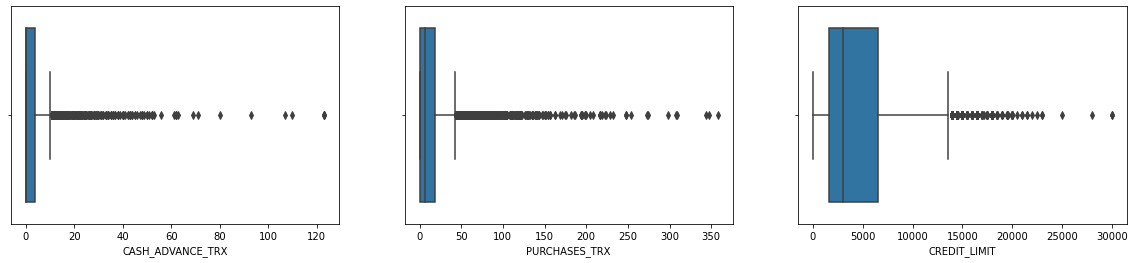

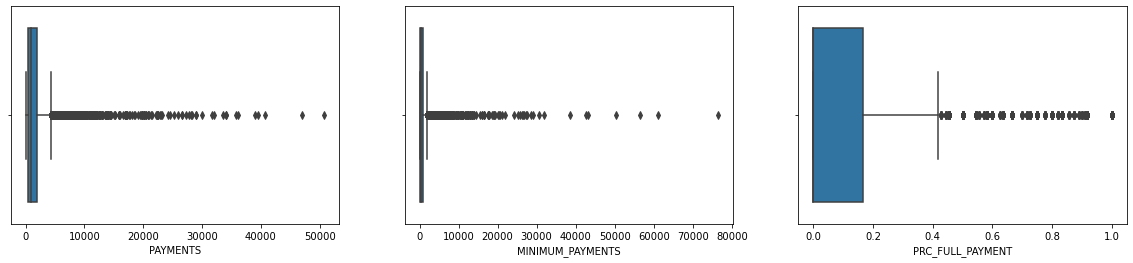

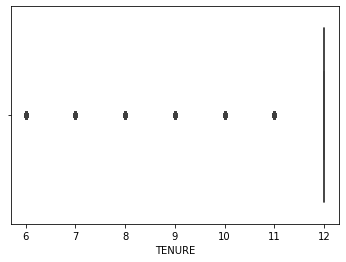

In [10]:
Numerical = ["ONEOFF_PURCHASES_FREQUENCY" , "PURCHASES_INSTALLMENTS_FREQUENCY" , "CASH_ADVANCE_FREQUENCY" ,
             "CASH_ADVANCE_TRX" , "PURCHASES_TRX" , "CREDIT_LIMIT" , "PAYMENTS" , "MINIMUM_PAYMENTS" , 
             "PRC_FULL_PAYMENT" , "TENURE"]

i = 0
while i < 11 :
    fig = plt.figure ( figsize = [20 , 4])
    plt.subplot ( 1 , 3 , 1)
    sns.boxplot ( x = Numerical[i] , data = df1 )
    i += 1
    if i == 10:
        break
    plt.subplot ( 1 , 3 , 2)
    sns.boxplot ( x = Numerical[i] , data = df1 )
    i += 1
    plt.subplot ( 1 , 3 , 3)
    sns.boxplot ( x = Numerical[i] , data = df1 )
    i += 1
    plt.show()

In [11]:
df1["TENURE"].nunique()

7

In [12]:
df1["TENURE"].nunique

<bound method IndexOpsMixin.nunique of 0       12
1       12
2       12
4       12
5       12
        ..
8943     6
8945     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8636, dtype: int64>

In [18]:
## ["BALANCE" , "BALANCE_FREQUENCY" , "PURCHASES" , "ONEOFF_PURCHASES" , "INSTALLMENTS_PURCHASES" ,
##"CASH_ADVANCE" ,"PURCHASES_FREQUENCY"] 
##  ["ONEOFF_PURCHASES_FREQUENCY" , "PURCHASES_INSTALLMENTS_FREQUENCY" , "CASH_ADVANCE_FREQUENCY" ,
#"CASH_ADVANCE_TRX" , "PURCHASES_TRX" , "CREDIT_LIMIT" , "PAYMENTS" , "MINIMUM_PAYMENTS" , 
#"PRC_FULL_PAYMENT" , "TENURE"]

<AxesSubplot:xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

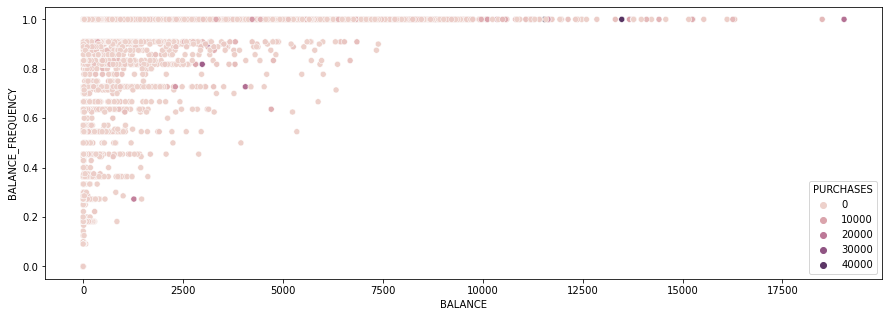

In [25]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "BALANCE" , y = "BALANCE_FREQUENCY" , hue = "PURCHASES" , data = df1)

Text(0.5, 1.0, 'PURCHASES VS PURCHASES_FREQUENCY')

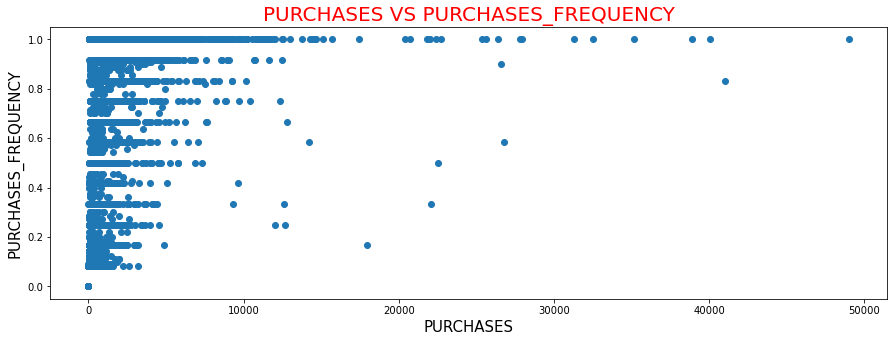

In [37]:
plt.figure (figsize = [15 , 5])
plt.scatter (df1["PURCHASES"] , df1["PURCHASES_FREQUENCY"])
plt.xlabel("PURCHASES" , fontsize = 15)
plt.ylabel("PURCHASES_FREQUENCY" , fontsize = 15)
plt.title ("PURCHASES VS PURCHASES_FREQUENCY" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'BALANCE VS BALANCE_FREQUENCY')

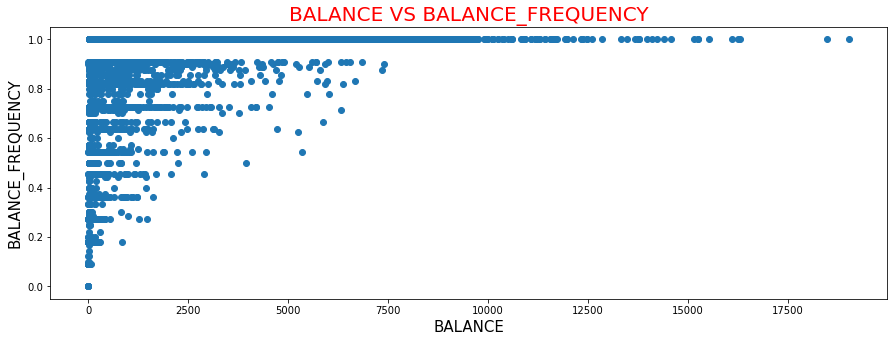

In [36]:
plt.figure (figsize = [15 , 5])
plt.scatter (df1["BALANCE"] , df1["BALANCE_FREQUENCY"])
plt.xlabel("BALANCE" , fontsize = 15)
plt.ylabel("BALANCE_FREQUENCY" , fontsize = 15)
plt.title ("BALANCE VS BALANCE_FREQUENCY" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'ONEOFF_PURCHASES VS INSTALLMENTS_PURCHASES')

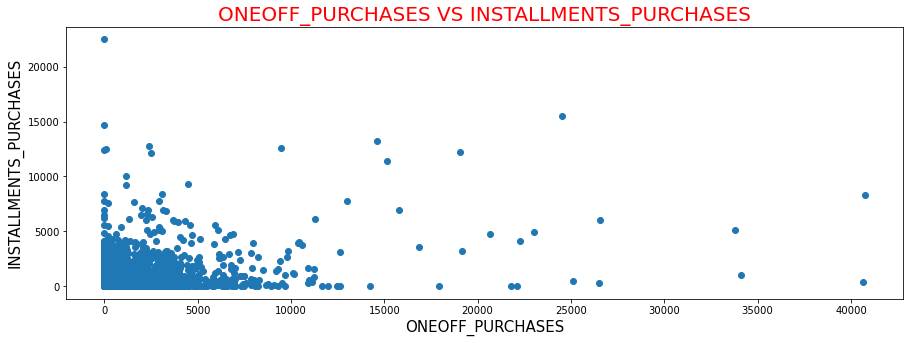

In [35]:
plt.figure (figsize = [15 , 5])
plt.scatter (df1["ONEOFF_PURCHASES"] , df1["INSTALLMENTS_PURCHASES"])
plt.xlabel("ONEOFF_PURCHASES" , fontsize = 15)
plt.ylabel("INSTALLMENTS_PURCHASES" , fontsize = 15)
plt.title ("ONEOFF_PURCHASES VS INSTALLMENTS_PURCHASES" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'ONEOFF_PURCHASES VS FREQUENCY')

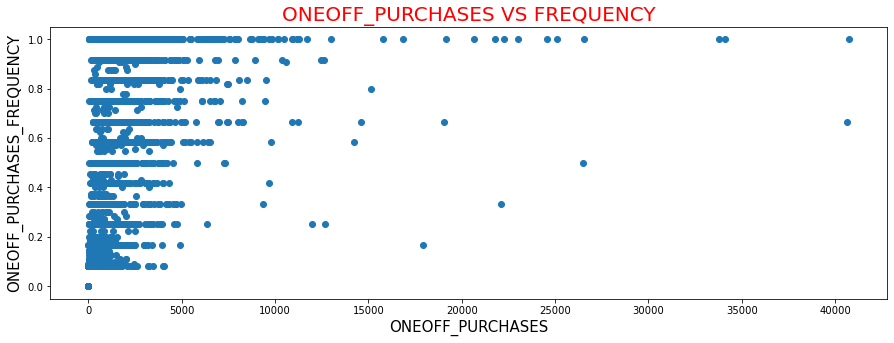

In [34]:
plt.figure (figsize = [15 , 5])
plt.scatter (df1["ONEOFF_PURCHASES"] , df1["ONEOFF_PURCHASES_FREQUENCY"])
plt.xlabel("ONEOFF_PURCHASES" , fontsize = 15)
plt.ylabel("ONEOFF_PURCHASES_FREQUENCY" , fontsize = 15)
plt.title ("ONEOFF_PURCHASES VS FREQUENCY" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'INSTALLMENTS_PURCHASES VS FREQUENCY')

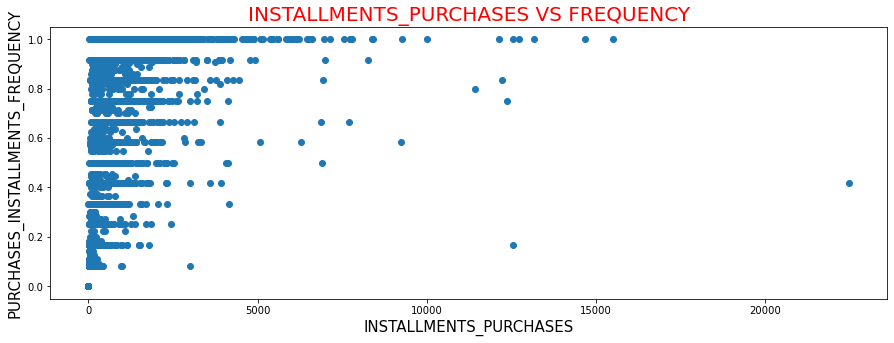

In [41]:
plt.figure (figsize = [15 , 5])
plt.scatter (df1["INSTALLMENTS_PURCHASES"] , df1["PURCHASES_INSTALLMENTS_FREQUENCY"])
plt.xlabel("INSTALLMENTS_PURCHASES" , fontsize = 15)
plt.ylabel("PURCHASES_INSTALLMENTS_FREQUENCY" , fontsize = 15)
plt.title ("INSTALLMENTS_PURCHASES VS FREQUENCY" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'CASH_ADVANCE VS FREQUENCY')

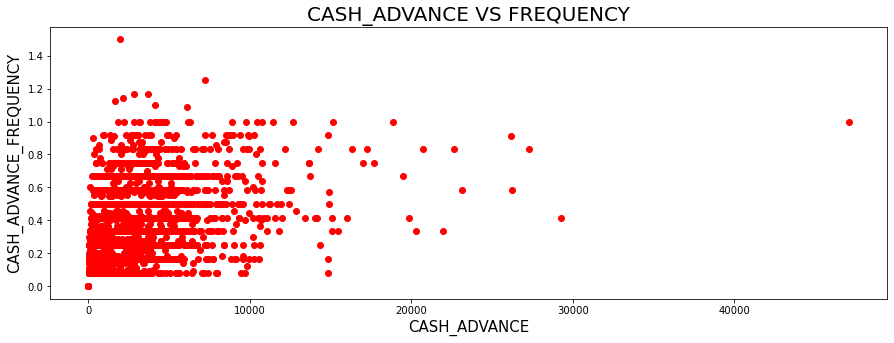

In [42]:
plt.figure (figsize = [15 , 5])
plt.scatter (df1["CASH_ADVANCE"] , df1["CASH_ADVANCE_FREQUENCY"] , color = "red")
plt.xlabel("CASH_ADVANCE" , fontsize = 15)
plt.ylabel("CASH_ADVANCE_FREQUENCY" , fontsize = 15)
plt.title ("CASH_ADVANCE VS FREQUENCY" , fontsize = 20)

Text(0.5, 1.0, 'INSTALLMENTS VS CASH FREQUENCY')

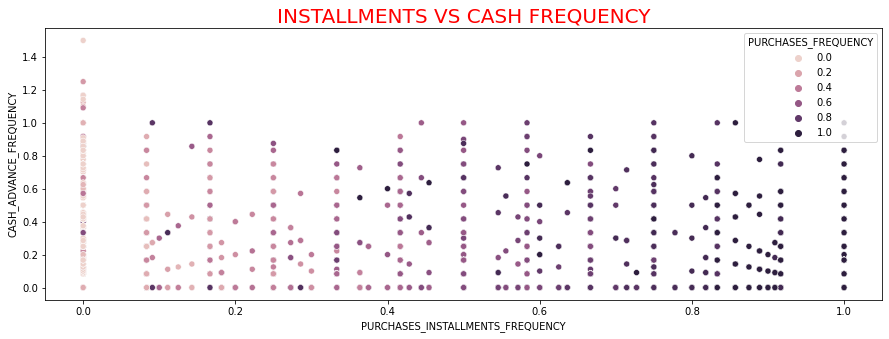

In [45]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "PURCHASES_INSTALLMENTS_FREQUENCY" , y = "CASH_ADVANCE_FREQUENCY" , hue = "PURCHASES_FREQUENCY" , data = df1)
plt.title ("INSTALLMENTS VS CASH FREQUENCY" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'INSTALLMENTS VS CASH PURCHASES')

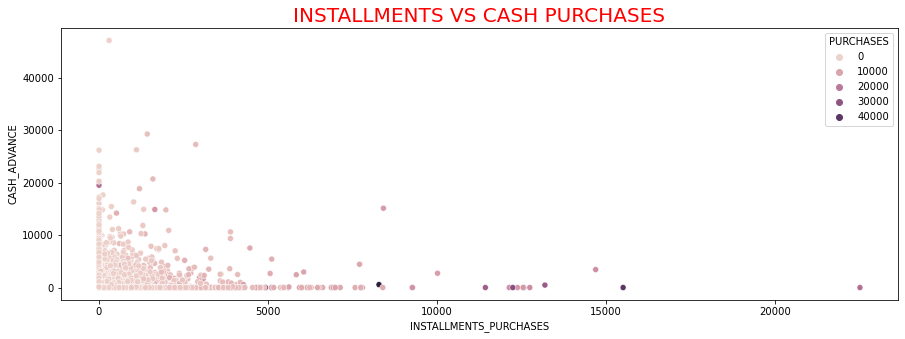

In [46]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "INSTALLMENTS_PURCHASES" , y = "CASH_ADVANCE" , hue = "PURCHASES" , data = df1)
plt.title ("INSTALLMENTS VS CASH PURCHASES" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'INSTALLMENTS VS CASH PURCHASES')

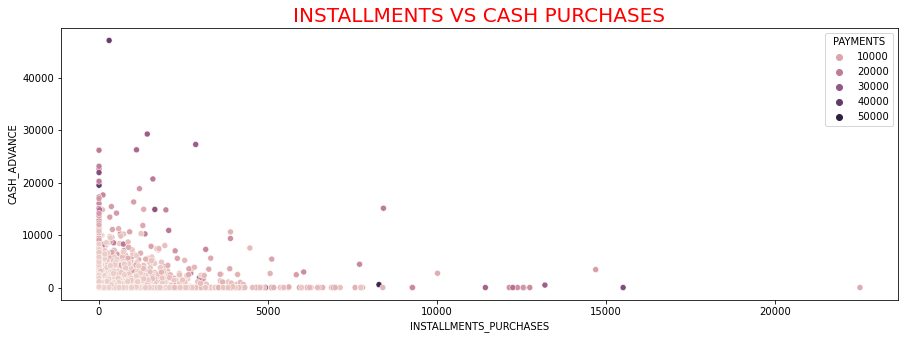

In [47]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "INSTALLMENTS_PURCHASES" , y = "CASH_ADVANCE" , hue = "PAYMENTS" , data = df1)
plt.title ("INSTALLMENTS VS CASH PURCHASES" , fontsize = 20 , color = "red")

In [48]:
## ["BALANCE" , "BALANCE_FREQUENCY" , "PURCHASES" , "ONEOFF_PURCHASES" , "INSTALLMENTS_PURCHASES" ,
##"CASH_ADVANCE" ,"PURCHASES_FREQUENCY"] 
##  ["ONEOFF_PURCHASES_FREQUENCY" , "PURCHASES_INSTALLMENTS_FREQUENCY" , "CASH_ADVANCE_FREQUENCY" ,
#"CASH_ADVANCE_TRX" , "PURCHASES_TRX" , "CREDIT_LIMIT" , "PAYMENTS" , "MINIMUM_PAYMENTS" , 
#"PRC_FULL_PAYMENT" , "TENURE"]

Text(0.5, 1.0, 'PAYMENTS VS PURCHASES')

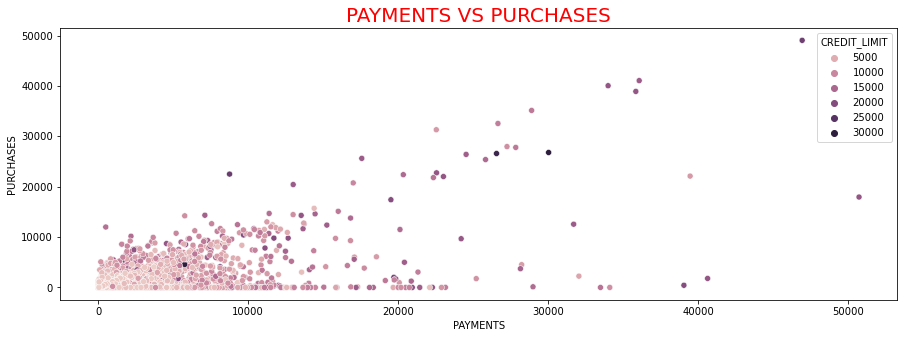

In [49]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "PAYMENTS" , y = "PURCHASES" , hue = "CREDIT_LIMIT" , data = df1)
plt.title ("PAYMENTS VS PURCHASES" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'CASH_TRX VS PURCHASES_TRX')

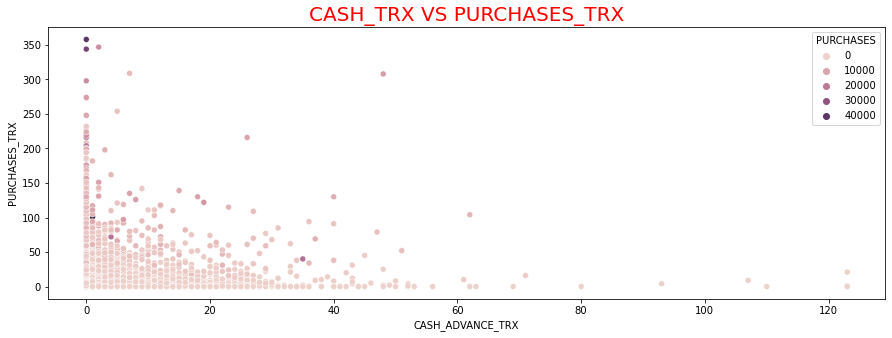

In [50]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "CASH_ADVANCE_TRX" , y = "PURCHASES_TRX" , hue = "PURCHASES" , data = df1)
plt.title ("CASH_TRX VS PURCHASES_TRX" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'CASH_TRX VS PURCHASES_TRX')

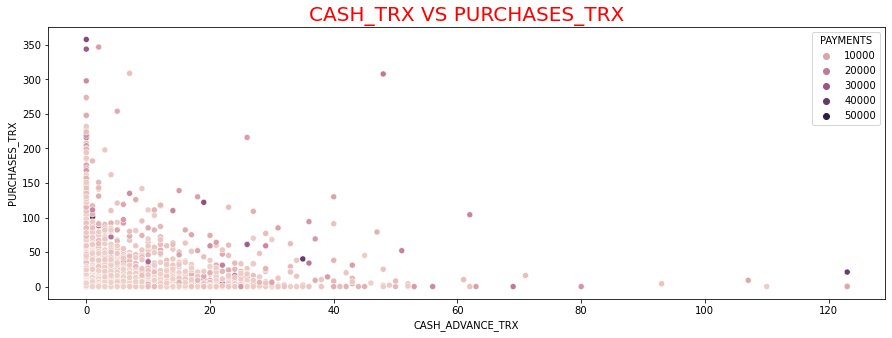

In [51]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "CASH_ADVANCE_TRX" , y = "PURCHASES_TRX" , hue = "PAYMENTS" , data = df1)
plt.title ("CASH_TRX VS PURCHASES_TRX" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'PURCHASES VS MINIMUM_PAYMENTS')

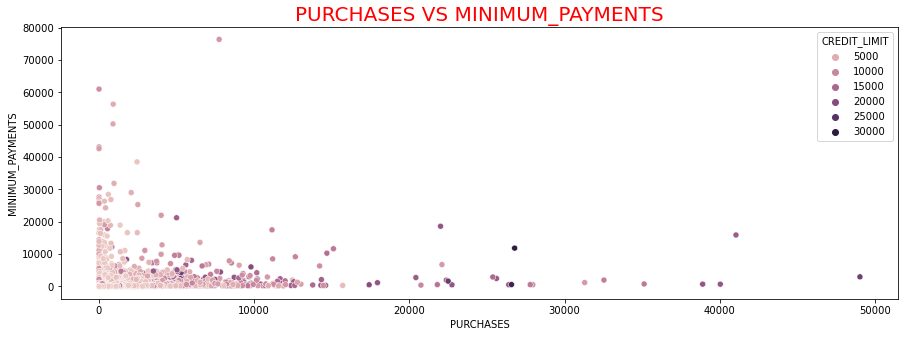

In [52]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "PURCHASES" , y = "MINIMUM_PAYMENTS" , hue = "CREDIT_LIMIT" , data = df1)
plt.title ("PURCHASES VS MINIMUM_PAYMENTS" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'MIN PAYMENTS VS ONEOFF')

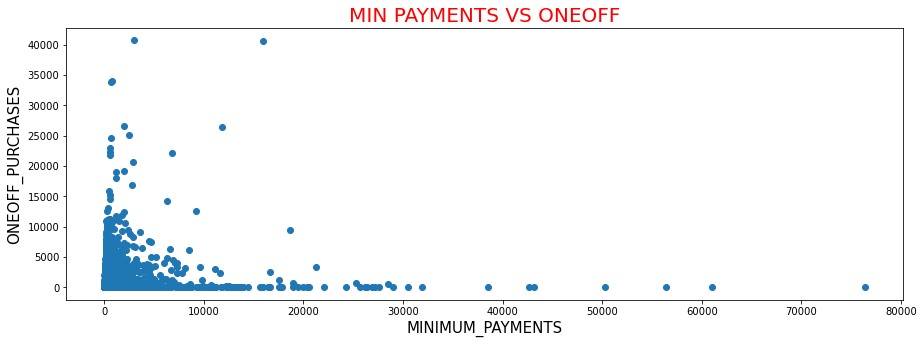

In [60]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["MINIMUM_PAYMENTS"] , df1["ONEOFF_PURCHASES"])
plt.xlabel("MINIMUM_PAYMENTS" , fontsize = 15)
plt.ylabel("ONEOFF_PURCHASES" , fontsize = 15)
plt.title ("MIN PAYMENTS VS ONEOFF" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'MIN PAYMENTS VS INSTALLMENTS')

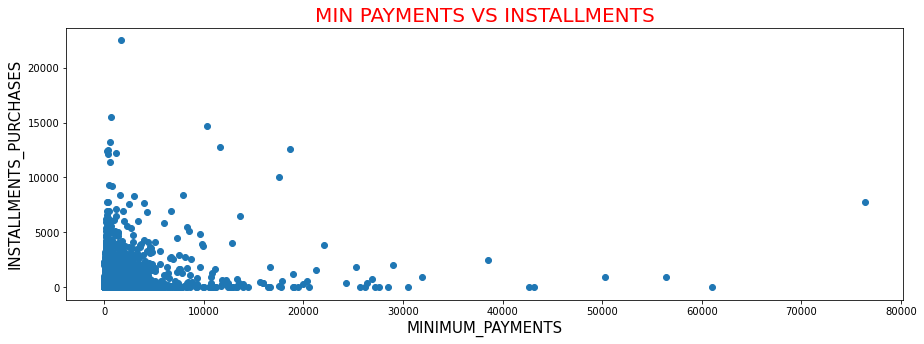

In [61]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["MINIMUM_PAYMENTS"] , df1["INSTALLMENTS_PURCHASES"])
plt.xlabel("MINIMUM_PAYMENTS" , fontsize = 15)
plt.ylabel("INSTALLMENTS_PURCHASES" , fontsize = 15)
plt.title ("MIN PAYMENTS VS INSTALLMENTS" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'TRX VS MINIMUM_PAYMENTS')

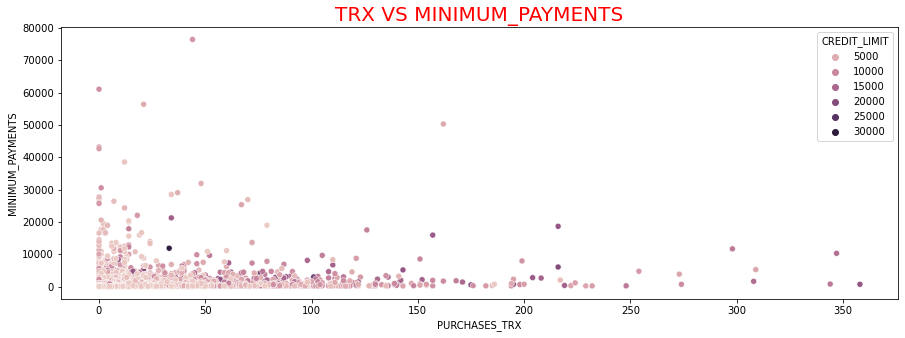

In [53]:
plt.figure (figsize = [15 , 5])
sns.scatterplot ( x = "PURCHASES_TRX" , y = "MINIMUM_PAYMENTS" , hue = "CREDIT_LIMIT" , data = df1)
plt.title ("TRX VS MINIMUM_PAYMENTS" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'CASH_ADVANCE VS PRC')

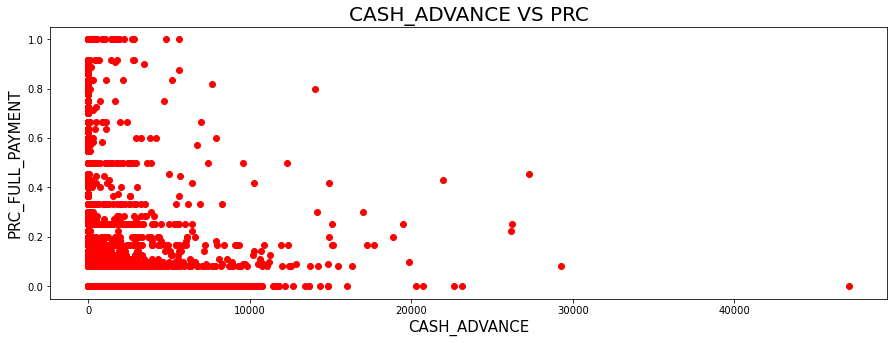

In [55]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["CASH_ADVANCE"] , df1["PRC_FULL_PAYMENT"] , color = "red")
plt.xlabel("CASH_ADVANCE" , fontsize = 15)
plt.ylabel("PRC_FULL_PAYMENT" , fontsize = 15)
plt.title ("CASH_ADVANCE VS PRC" , fontsize = 20)

Text(0.5, 1.0, 'PAYMENTS VS PRC')

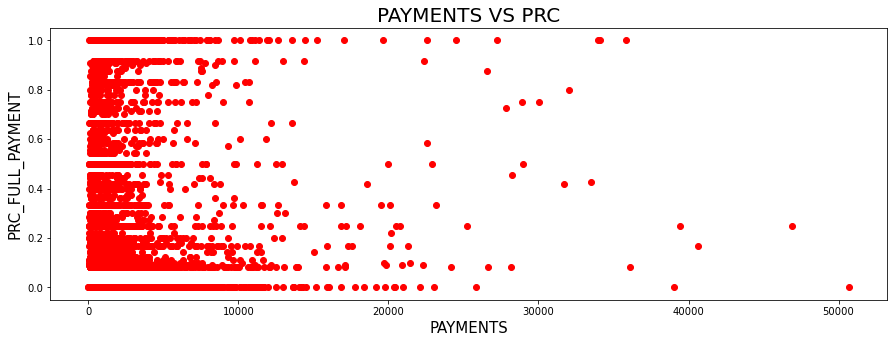

In [56]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["PAYMENTS"] , df1["PRC_FULL_PAYMENT"] , color = "red")
plt.xlabel("PAYMENTS" , fontsize = 15)
plt.ylabel("PRC_FULL_PAYMENT" , fontsize = 15)
plt.title ("PAYMENTS VS PRC" , fontsize = 20)

Text(0.5, 1.0, 'CREDIT_LIMIT VS PRC')

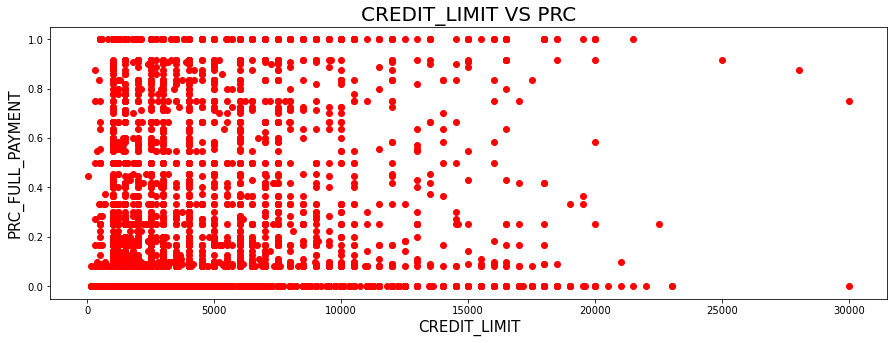

In [62]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["CREDIT_LIMIT"] , df1["PRC_FULL_PAYMENT"] , color = "red")
plt.xlabel("CREDIT_LIMIT" , fontsize = 15)
plt.ylabel("PRC_FULL_PAYMENT" , fontsize = 15)
plt.title ("CREDIT_LIMIT VS PRC" , fontsize = 20)

Text(0.5, 1.0, 'BALANCE VS TENURE')

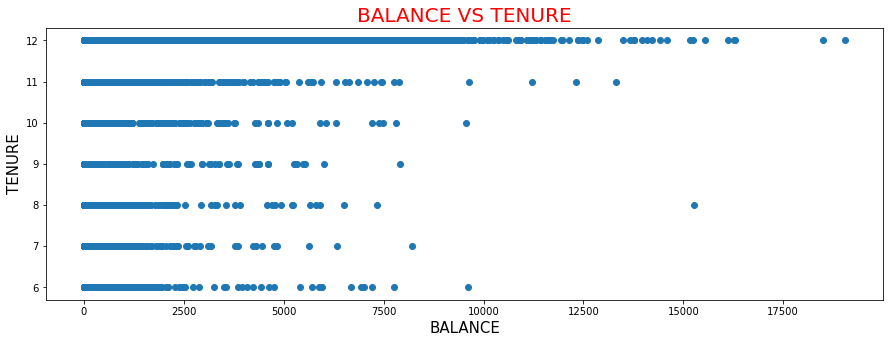

In [58]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["BALANCE"] , df1["TENURE"])
plt.xlabel("BALANCE" , fontsize = 15)
plt.ylabel("TENURE" , fontsize = 15)
plt.title ("BALANCE VS TENURE" , fontsize = 20 , color = "red")

Text(0.5, 1.0, 'PAYMENTS VS TENURE')

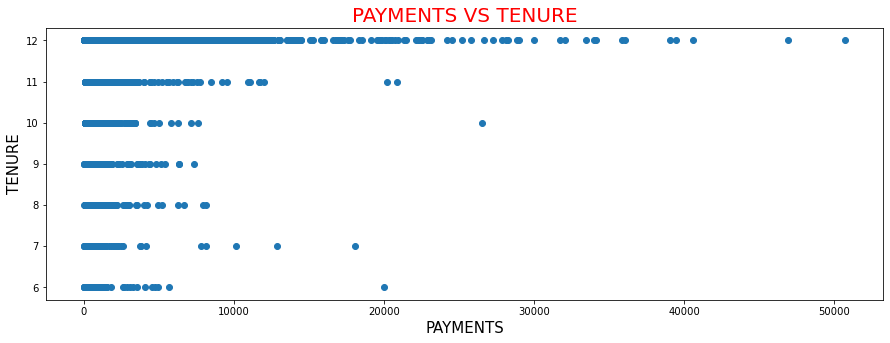

In [59]:
plt.figure (figsize = [15 , 5])   
plt.scatter (df1["PAYMENTS"] , df1["TENURE"])
plt.xlabel("PAYMENTS" , fontsize = 15)
plt.ylabel("TENURE" , fontsize = 15)
plt.title ("PAYMENTS VS TENURE" , fontsize = 20 , color = "red")

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=3)
pca.fit(scaled_df1)
PCA_df1 = pd.DataFrame(pca.transform(scaled_df1), columns=(["col1","col2", "col3"]))
PCA_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,8636.0,2.050236e-16,2.151705,-2.797928,-1.501037,-0.440097,0.771696,29.200726
col2,8636.0,5.844612e-16,1.861191,-2.734723,-1.266294,-0.477395,0.741260,25.108914
col3,8636.0,-8.685348e-17,1.231378,-10.269413,-0.765436,0.014678,0.539660,15.953990


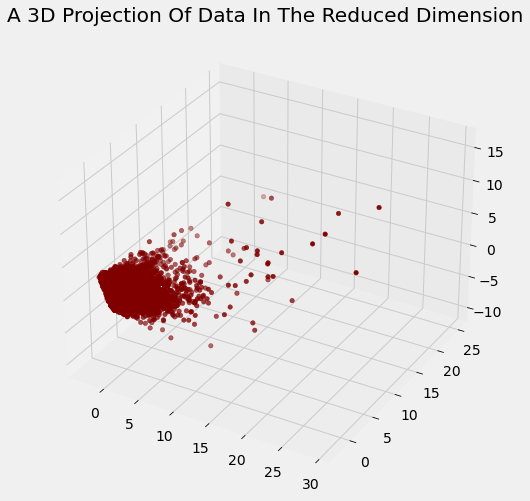

In [79]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df1["col1"]
y =PCA_df1["col2"]
z =PCA_df1["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [83]:
pip install yellowbrick

In [84]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


C:\Users\admin\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

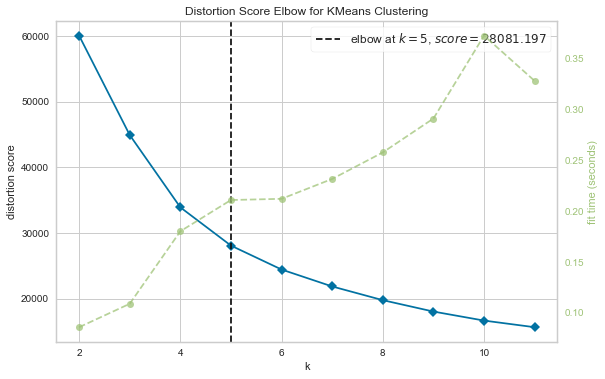

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [88]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=11)
Elbow_M.fit(PCA_df1)
Elbow_M.show()

In [95]:
### the best  k = 5

In [91]:
kmeans = KMeans (n_clusters = 5)
# fit model and predict clusters
yhat_km = kmeans.fit_predict(PCA_df1)
PCA_df1["Clusters"] = yhat_km
#Adding the Clusters feature to the orignal dataframe.
df1["Clusters"]= yhat_km

C:\Users\admin\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\AppData\Local\Temp\ipykernel_3796\3791062193.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Clusters"]= yhat_km


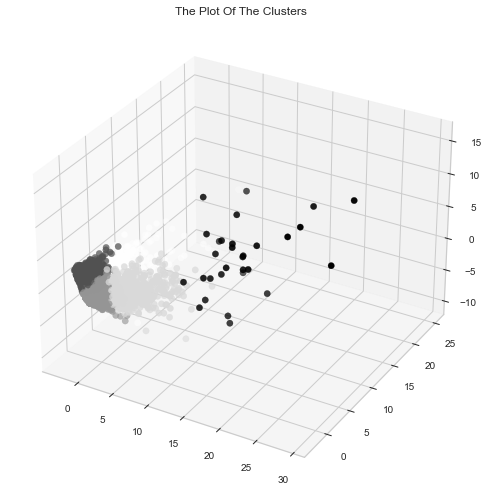

In [93]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df1["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

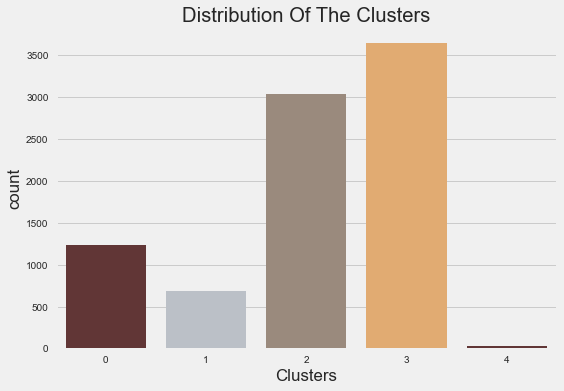

In [104]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df1["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [109]:
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2
